In [1]:
!pip install tensorflow==2.15.0
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install wordcloud
!pip install nltk

ERROR: Could not find a version that satisfies the requirement tensorflow==2.15.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.15.0


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.5.1 which is incompatible.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [5]:
train_data = pd.read_csv("train.txt", header=None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")
# get all words length in comment
train_data['length'] = [len(x) for x in train_data['Comment']]

In [6]:
train_data

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [7]:
train_data.shape

(16000, 3)

In [8]:
train_data.isnull().sum()


Comment    0
Emotion    0
length     0
dtype: int64

In [9]:
train_data.duplicated().sum()

1

## Exploratory Data Analysis

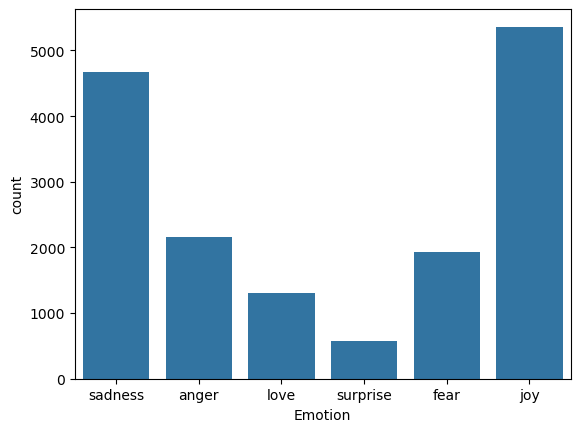

In [10]:
sns.countplot(x = train_data['Emotion'])
plt.show()

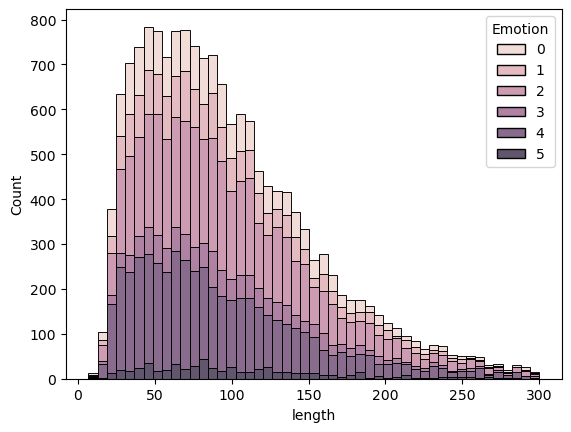

In [23]:
# distribution of data
df2 = train_data.copy()
df2['length'] = [len(x) for x in df2['Comment']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Emotion', multiple='stack')

plt.show()

In [28]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U11')) -> None

<Figure size 1000x1000 with 0 Axes>

## Data Preprocessing

In [ ]:
## encoding the emotions

In [55]:
lb = LabelEncoder()
train_data['Emotion_encoded'] = lb.fit_transform(train_data['Emotion'])

In [56]:
train_data

,Comment,Emotion,length,Emotion_encoded
0,i didnt feel humiliated,4,23,4
1,i can go from feeling so hopeless to so damned...,4,108,4
2,im grabbing a minute to post i feel greedy wrong,0,48,0
3,i am ever feeling nostalgic about the fireplac...,3,92,3
4,i am feeling grouchy,0,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101,4
15996,i am now turning and i feel pathetic that i am...,4,102,4
15997,i feel strong and good overall,2,30,2
15998,i feel like this was such a rude comment and i...,0,59,0


In [16]:
# applying machine learning algorithms

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [58]:
df = train_data.copy()

In [59]:
df

,Comment,Emotion,length,Emotion_encoded
0,i didnt feel humiliated,4,23,4
1,i can go from feeling so hopeless to so damned...,4,108,4
2,im grabbing a minute to post i feel greedy wrong,0,48,0
3,i am ever feeling nostalgic about the fireplac...,3,92,3
4,i am feeling grouchy,0,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101,4
15996,i am now turning and i feel pathetic that i am...,4,102,4
15997,i feel strong and good overall,2,30,2
15998,i feel like this was such a rude comment and i...,0,59,0


In [61]:
# Data cleaning and preprocessing
# Download NLTK stopwords
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
clean_text("I am 23432 % loving hating, hated, loved")
df['cleaned_comment'] = df['Comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
df

,Comment,Emotion,length,Emotion_encoded,cleaned_comment
0,i didnt feel humiliated,4,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,4,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,2,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,0,59,0,feel like rude comment im glad


In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'],df['Emotion_encoded'],test_size=0.2,random_state=42)

In [44]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [64]:
# Multi-class classification using different algorithms
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))


===== Multinomial Naive Bayes =====

Accuracy using TF-IDF: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


===== Logistic Regression =====

Accuracy using TF-IDF: 0.829375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
       

In [65]:
# selecting model
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

In [74]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorized = tfidf_vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lg.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lg.predict(input_vectorized))

    return predicted_emotion,label

# Example usage 
sentences = [
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : 4
Label : 4
i feel strong and good overall
Prediction : 2
Label : 2
im grabbing a minute to post i feel greedy wrong
Prediction : 0
Label : 0
He was speechles when he found out he was accepted to this new job
Prediction : 2
Label : 2
This is outrageous, how can you talk like that?
Prediction : 0
Label : 0
I feel like im all alone in this world
Prediction : 4
Label : 4
He is really sweet and caring
Prediction : 3
Label : 3
You made me very crazy
Prediction : 4
Label : 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : 3
Label : 3
i am feeling grouchy
Prediction : 0
Label : 0
He hates you
Prediction : 0
Label : 0


In [77]:
# save files
import pickle
pickle.dump(lg,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl",'wb'))

In [78]:
import sklearn
print(sklearn.__version__) # have to use this in pycharm

1.4.2


## Deep Learning using LSTM

In [79]:
## cleaning and encoding

In [83]:
# text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
        
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Text cleaning & encoding
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

## Model Building and Training

In [87]:
# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[callback])

C:\Users\Ayush\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 176s 667ms/step - accuracy: 0.3020 - loss: 1.6674
Epoch 2/10


C:\Users\Ayush\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 168s 672ms/step - accuracy: 0.6037 - loss: 1.1005
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 667ms/step - accuracy: 0.8406 - loss: 0.5359
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 167s 669ms/step - accuracy: 0.8910 - loss: 0.3414
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 169s 675ms/step - accuracy: 0.9261 - loss: 0.2298
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 687ms/step - accuracy: 0.9442 - loss: 0.1659
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 166s 663ms/step - accuracy: 0.9550 - loss: 0.1333
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 166s 663ms/step - accuracy: 0.9617 - loss: 0.1186
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 165s 660ms/step - accuracy: 0.9677 - loss: 0.0921
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 162s 648ms/step - accuracy: 0.9747 - loss: 0.0782


## Predictive System

In [90]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
2 : 0.9991989731788635


im grabbing a minute to post i feel greedy wrong
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
0 : 0.99831223487854


He was speechles when he found out he was accepted to this new job
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
2 : 0.9026262760162354


This is outrageous, how can you talk like that?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
0 : 0.9923866987228394


I feel like im all alone in this world
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
4 : 0.9976465106010437


He is really sweet and caring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
3 : 0.9797894954681396


You made me very crazy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
4 : 0.6430315971374512


i

In [91]:
## saving the models ans files

In [94]:
model.save('model1.h5')

# Save the LabelEncoder
with open('lb1.pkl', 'wb') as f:
    pickle.dump(lb, f)

# Save vocabulary size and max length
vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)

In [95]:
# use this version
import tensorflow
import keras
print(keras.__version__)
print(tensorflow.__version__)

3.7.0
2.18.0
